In [1]:
import script as sr

In [2]:
HEIGHT, WIDTH, CHANNEL = 512, 512, 3
#X_train - >BGR2HSV
X_train = sr.imagePrep('data/train/*.jpg', WIDTH, HEIGHT, CHANNEL)
X_test = sr.imagePrep('data/test/*.jpg', WIDTH, HEIGHT, CHANNEL)

#Y_train -> BGR2GRAY 
Y_train = sr.imagePrep('data/target/*.jpg', WIDTH, HEIGHT, 1)

print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)
print(Y_train.shape, Y_train.dtype)

(28, 512, 512, 3) float32
(12, 512, 512, 3) float32
(28, 512, 512, 1) float32


In [3]:
#Y_train 0,1 로 
Y_train = Y_train.astype('int32')

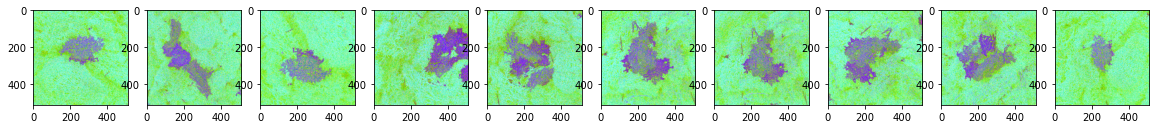

In [4]:
fig = sr.imageVis(X_train ,WIDTH, HEIGHT,CHANNEL)

In [5]:
#결과 값이 GRAY img
model = sr.get_model((512, 512), 1)

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [7]:
#모델 학습부분

#모델 저장 폴더 설정
# MODEL_DIR = './model/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)


# #모델 저장 조건 설정
# from tensorflow.keras.callbacks import ModelCheckpoint
# modelpath = './model/{epoch:02d}-{accuracy:.4f}.hdf5'

# #모델 업데이트 및 저장
# checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'accuracy', 
#                               verbose = 1, save_best_only = True)

# model.compile(optimizer='adam', loss='categorical_crossentropy' ,metrics=['accuracy'])
# model.fit(X_train, Y_train, epochs=16, batch_size=4, validation_data=(X_train, Y_train), callbacks = [checkpointer])

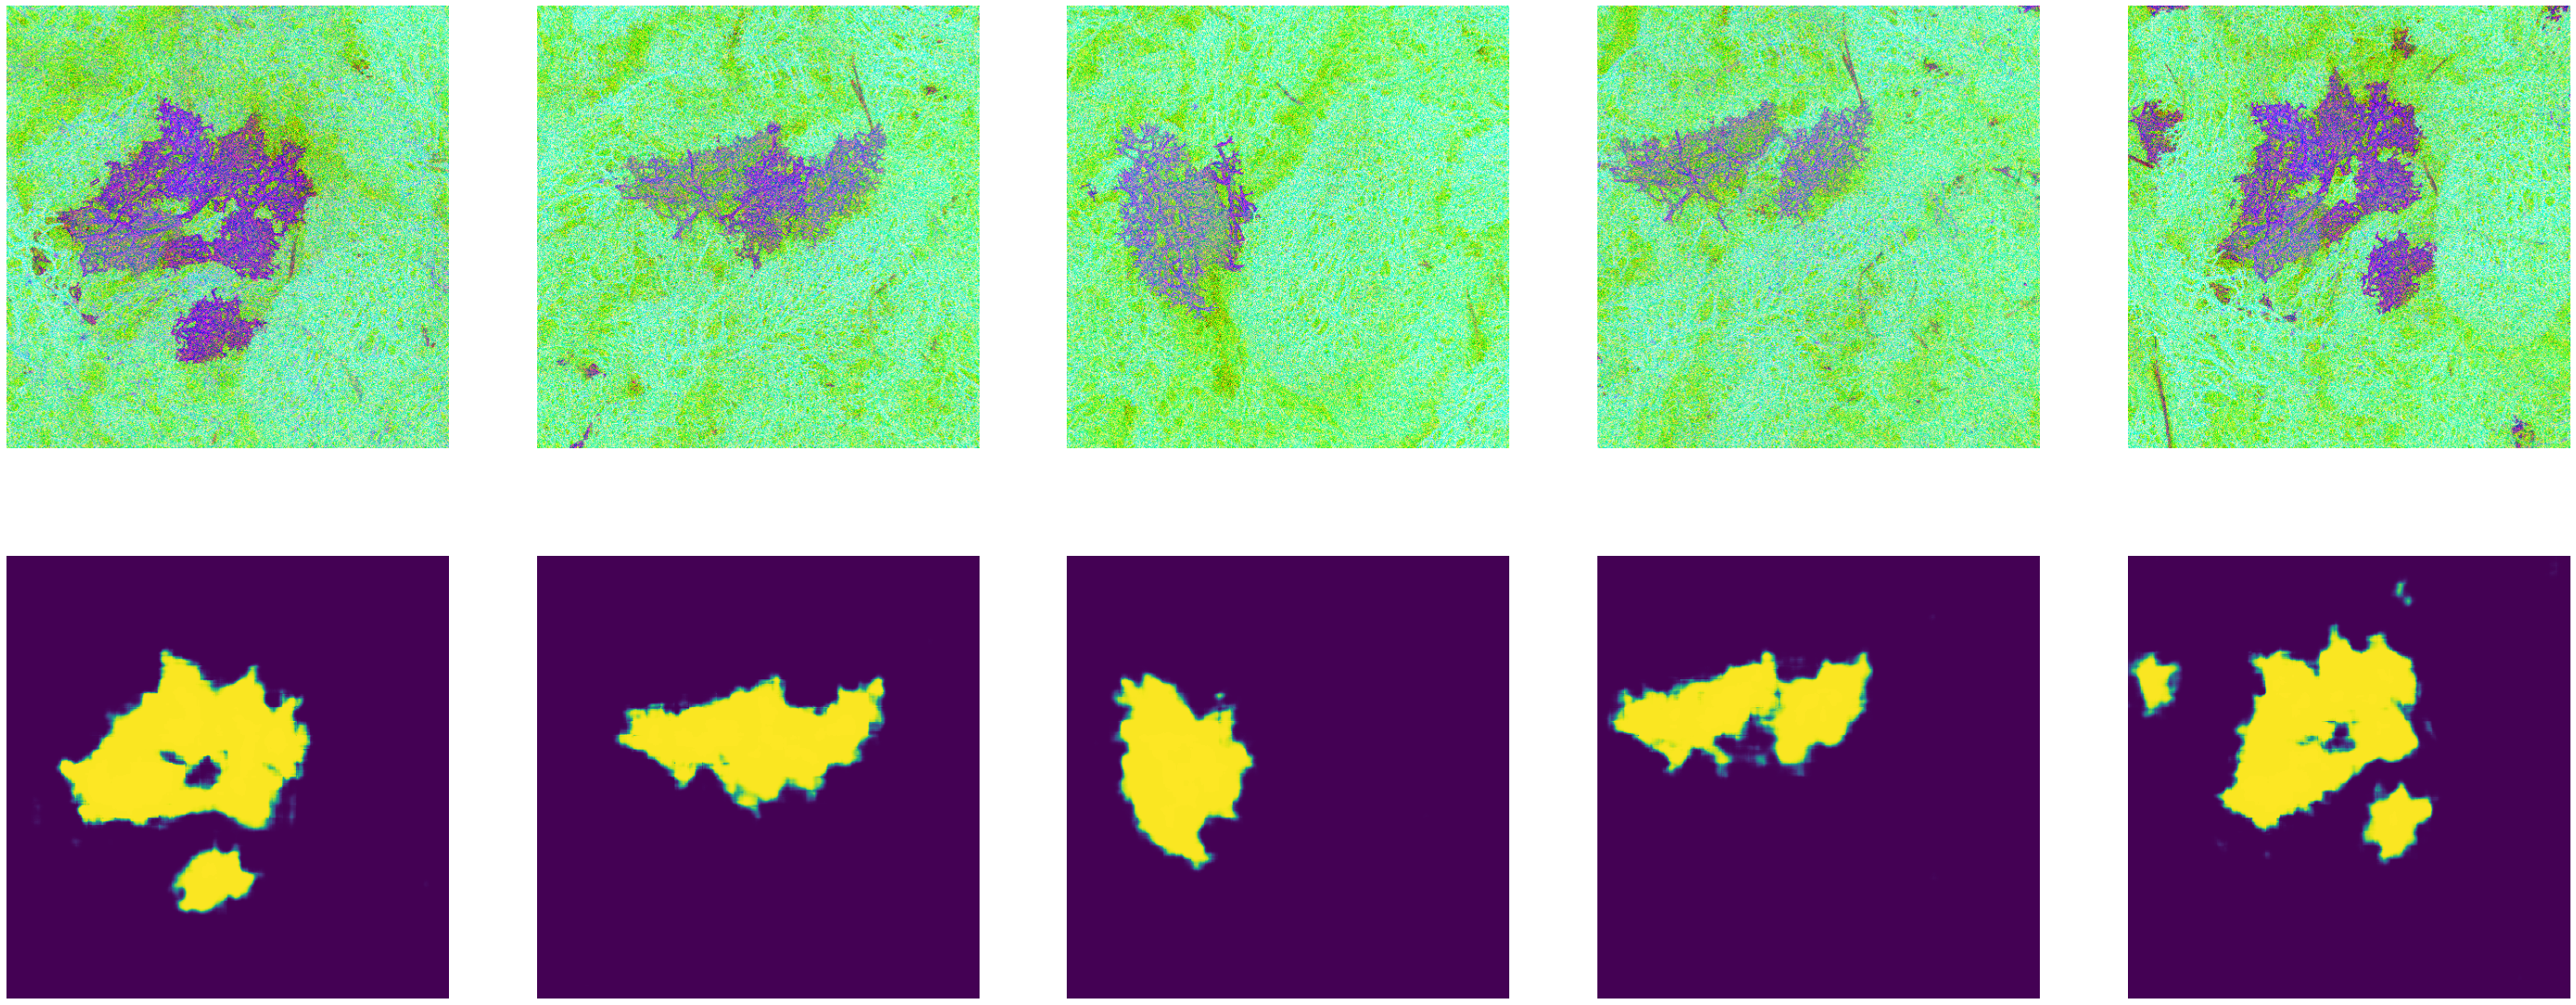

In [8]:
#학습핧 모델 지정.
model_path= './model/100/test (100).hdf5'
load_model = sr.test_model(model_path, X_test)

In [10]:
#입력모델, 이미지 num
img=sr.display_mask(load_model,0)

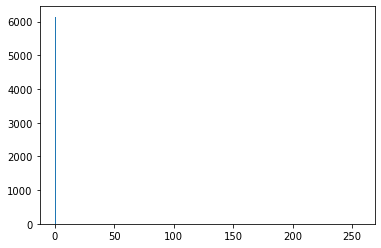

array([0.], dtype=float32)

In [11]:
sr.calArea(img)